<a href="https://colab.research.google.com/github/JSunkel/Forecasting-Models/blob/master/Prophet%20monthly%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet

In [17]:
df = pd.read_csv('drive/My Drive/Churn/vol_basic_acct_monthly_feb.csv')
df.tail(5)

,ds,y
21,2019-10,45897
22,2019-11,44512
23,2019-12,48658
24,2020-01,52871
25,2020-02,42395


In [24]:
model = Prophet().fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [0]:
future = model.make_future_dataframe(periods = 10, freq = 'M')

In [0]:
forecast = model.predict(future)

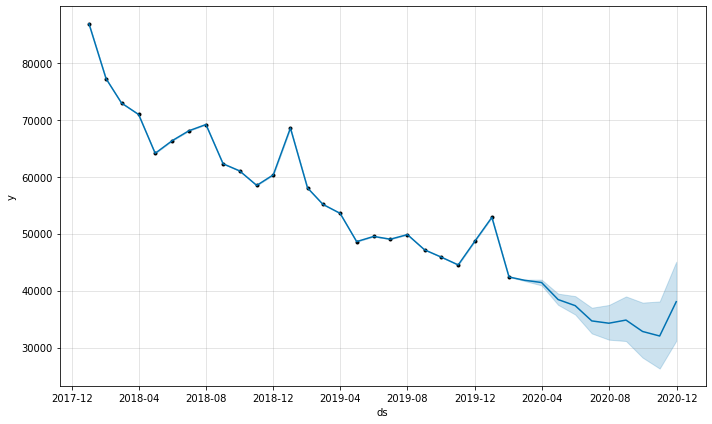

In [27]:
fig = model.plot(forecast)

In [30]:
forecast[['ds', 'yhat']].tail(12)

,ds,yhat
24,2020-01-01,52871.000000
25,2020-02-01,42395.000000
26,2020-02-29,41815.304049
27,2020-03-31,41421.137021
28,2020-04-30,38427.092138
29,2020-05-31,37352.205653
30,2020-06-30,34673.376004
31,2020-07-31,34269.340924
32,2020-08-31,34820.668661
33,2020-09-30,32818.338969


In [0]:
forecast.to_csv('drive/My Drive/Churn/')